## Observations and Insights 

In [60]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combined = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
mouse_study_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [61]:
# Checking the number of mice.
total_mice=len(mouse_study_combined["Mouse ID"].unique())
total_mice=pd.DataFrame ({"Total Mice":[total_mice]})
total_mice.head()

,Total Mice
0,249


In [62]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = mouse_study_combined.loc[mouse_study_combined.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_mice

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [63]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_combined[mouse_study_combined["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [64]:
# Checking the number of mice in the clean DataFrame
new_total_mice=len(clean_df["Mouse ID"].unique())
new_total_mice=pd.DataFrame ({"Total Mice": [new_total_mice]})
new_total_mice.head()

,Total Mice
0,248


## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#groupby drug regimen
drug_info = clean_df.groupby(["Drug Regimen"])
#mean tumor volume
average_tumor_volume = drug_info["Tumor Volume (mm3)"].mean()
#median tumor volume
median_tumor_volume = drug_info["Tumor Volume (mm3)"].median()
#variance tumor volume
variance_tumor_volume = drug_info["Tumor Volume (mm3)"].var()
#standarad deviation tumor volume
standard_deviation_tumor_volume = drug_info["Tumor Volume (mm3)"].std()
#SEM tumor volume
sem_tumor_volume = drug_info["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_volume_df = pd.DataFrame({"Tumor Volume Mean":average_tumor_volume,
                               "Tumor Volume Median":median_tumor_volume,
                               "Tumor Volume Variance":variance_tumor_volume,
                               "Tumor Volume Standard Deviation":standard_deviation_tumor_volume,
                               "Tumor Volume SEM":sem_tumor_volume})
tumor_volume_df.head()

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
stats_table = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
stats_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

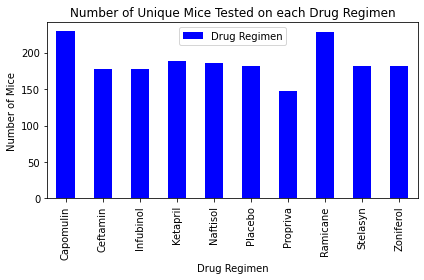

In [67]:
# Generate a bar plot showing the total number of mice tested on each drug regimen using pandas.
mice_tested = pd.DataFrame(drug_info["Drug Regimen"].count())

mice_tested_bar_chart = mice_tested.plot(kind = "bar", title="Number of Unique Mice Tested on each Drug Regimen", color="blue")
mice_tested_bar_chart.set_xlabel("Drug Regimen")
mice_tested_bar_chart.set_ylabel("Number of Mice")
plt.tight_layout()
plt.show


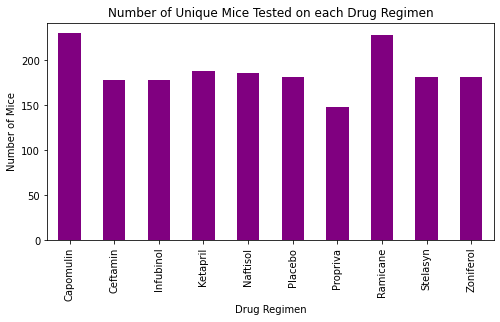

In [68]:
# Generate a bar plot showing the total number of mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(mice_tested))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,4))
plt.bar(x_axis, mice_tested["Drug Regimen"], color = "purple", align = "center", width = 0.5)
plt.xticks(tick_locations, list(mice_tested.index), rotation = "vertical")

plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(mice_tested["Drug Regimen"])*1.05)

plt.title("Number of Unique Mice Tested on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()


In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = clean_df.groupby("Sex")
gender_count = pd.DataFrame(gender_data["Mouse ID"].nunique())
gender_count
#I counted the number of females in the dataset vs the number of males. 
#To look at how many times females were tested vs males, ie how many times female occurs in the dataset vs male, 
#I would start with this formula:
#clean_df.Sex.value_counts()

,Mouse ID
Sex,
Female,123
Male,125


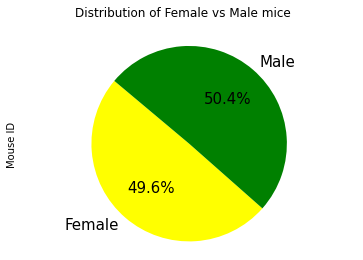

In [70]:
gender_count.plot(kind="pie", subplots = True, title = "Distribution of Female vs Male mice", startangle=140,
                autopct='%1.1f%%', fontsize=15, colors= ["yellow","green"], legend=False)
plt.axis("equal")
plt.show()

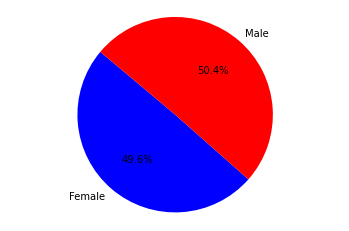

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count[("Mouse ID")], labels=["Female", "Male"], colors=["blue","red"],
       autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_merge = pd.merge(last_timepoint, clean_df, on = ('Mouse ID', 'Timepoint'), how = 'left')
last_timepoint_merge.set_index(["Mouse ID"])

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a262,45,Placebo,Female,17,29,70.717621,4
a275,45,Ceftamin,Female,20,28,62.999356,3
a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...
z435,10,Propriva,Female,12,26,48.710661,0
z578,45,Ramicane,Male,11,16,30.638696,0
z581,45,Infubinol,Female,24,25,62.754451,3


In [73]:
#Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in treatment_list:
    last_tumor_volume = last_timepoint_merge.loc[last_timepoint_merge["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    tumor_volume_data.append(last_tumor_volume)
    quartiles = last_tumor_volume.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[.75]
    iqr=upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = [y for y in last_tumor_volume if (y < lower_bound) | (y > upper_bound)]

    #print
    print(f"The lower quartile of {x} is: {lowerq}")
    print(f"The upper quartile of {x} is: {upperq}")
    print(f"The interquartile range of {x} is: {iqr}")
    print(f"The median of {x} is {quartiles[0.5]}")
    print(f"Values below {lower_bound} for {x} could be outliers")
    print(f"Values above {upper_bound} for {x} could be outliers")
    print(f"****************************************************************")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is 38.125164399999996
Values below 20.70456164999999 for Capomulin could be outliers
Values above 51.83201549 for Capomulin could be outliers
****************************************************************
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is 36.56165229
Values below 17.912664470000003 for Ramicane could be outliers
Values above 54.30681135 for Ramicane could be outliers
****************************************************************
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is 60.16518046
Values below 36.83290494999999 for Infubinol c

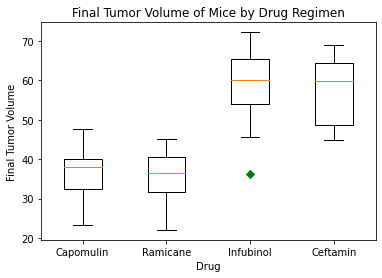

In [74]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title ("Final Tumor Volume of Mice by Drug Regimen")
ax1.set_xlabel("Drug")
ax1.set_ylabel("Final Tumor Volume")
ax1.boxplot(tumor_volume_data, notch = 0, sym = 'gD')
plt.xticks([1,2,3,4], treatment_list)

plt.show()

## Line and Scatter Plots

In [75]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# I chose female mouse ID s185
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_id = capomulin_df.loc[capomulin_df["Mouse ID"]== "s185"]
mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


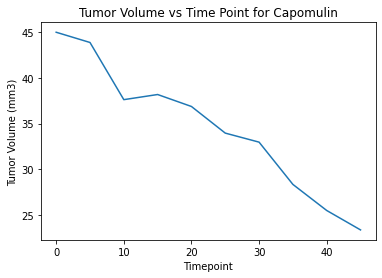

In [76]:
x_axis = mouse_id["Timepoint"]
y_axis = mouse_id["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)

plt.title("Tumor Volume vs Time Point for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [77]:
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


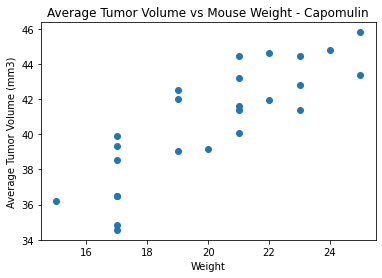

In [78]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df_average= capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_df_average["Weight (g)"], capomulin_df_average["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs Mouse Weight - Capomulin")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717
The correlation coefficient between weight and average tumor volume is 0.84


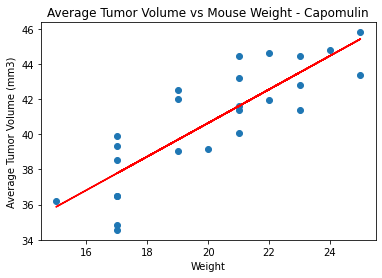

In [80]:
# Calculate the correlation coefficient and linear regression model 
# The first time I run this, I get a 'nan' for correlation coefficient. I run again and get the result of .84
weight = capomulin_df_average["Weight (g)"]
avg_tumor_volume = capomulin_df_average["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress (weight, avg_tumor_volume)
regress_values = weight * slope + intercept

correlation = round(st.pearsonr(weight,avg_tumor_volume)[0],2)
plt.scatter(capomulin_df_average["Weight (g)"], capomulin_df_average["Tumor Volume (mm3)"])
plt.plot(weight,regress_values,"r-")
plt.title("Average Tumor Volume vs Mouse Weight - Capomulin")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between weight and average tumor volume is {correlation}")
plt.show()